In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

# Load datasets with space delimiter
class1 = pd.read_csv('desktop/internship/dataset/LS_Data/class1.txt', delimiter=' ', header=None)
class1.columns = ['X', 'Y']
class2 = pd.read_csv('desktop/internship/dataset/LS_Data/class2.txt', delimiter=' ', header=None)
class2.columns = ['X', 'Y']
class3 = pd.read_csv('desktop/internship/dataset/LS_Data/class3.txt', delimiter=' ', header=None)
class3.columns = ['X', 'Y']

# Combine the datasets
combined_dataset = pd.concat([class1, class2, class3], ignore_index=True)


# Features and labels
X = combined_dataset[['X', 'Y']]  # Features (X and Y)
y = np.concatenate([np.zeros(len(class1)), np.ones(len(class2)), np.full(len(class3), 2)])  # Labels: Class 1, 2, 3

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to calculate Euclidean distances between a random point and dataset
def euclidean_distances(X_train, ):
    distances = []  # To store calculated distances
    for _, row in X_train.iterrows():
        row_point = row.values  # Convert row to NumPy array
        distance = np.sqrt(np.sum((row_point - random_point) ** 2))  # Euclidean formula
        distances.append(distance)  # Append result to distances
    return np.array(distances)

# Calculate distances array
random_point = X.sample(n=1).values.flatten()  # Select a random point from X
# Calculate the mean of each class manually
mean_class1 = [sum(class1['X']) / len(class1), sum(class1['Y']) / len(class1)]
mean_class2 = [sum(class2['X']) / len(class2), sum(class2['Y']) / len(class2)]
mean_class3 = [sum(class3['X']) / len(class3), sum(class3['Y']) / len(class3)]

# Store the class means
class_means = {
    'Class 1': mean_class1,
    'Class 2': mean_class2,
    'Class 3': mean_class3
}

# Function to calculate Euclidean distance manually
def calculate_distance(point1, point2):
    distance = 0  # Initialize distance
    for i in range(len(point1)):
        difference = point1[i] - point2[i]
        distance += difference * difference  # Square the difference
    return distance ** 0.5  # Take the square root of the sum

# Calculate the distances between the random point and each class mean
distances = {}
for class_name, mean in class_means.items():
    distance = calculate_distance(random_point, mean)
    distances[class_name] = distance

# Print the distances
print("\nDistances between the random point and each class mean:")
for class_name, distance in distances.items():
    print(f"{class_name}: {distance:.2f}")

# Determine the closest class mean
closest_class = None
min_distance = float('inf')
for class_name, distance in distances.items():
    if distance < min_distance:
        min_distance = distance
        closest_class = class_name

print(f"\nThe closest class mean to the random point is: {closest_class}")




Distances between the random point and each class mean:
Class 1: 16.57
Class 2: 19.39
Class 3: 5.18

The closest class mean to the random point is: Class 3


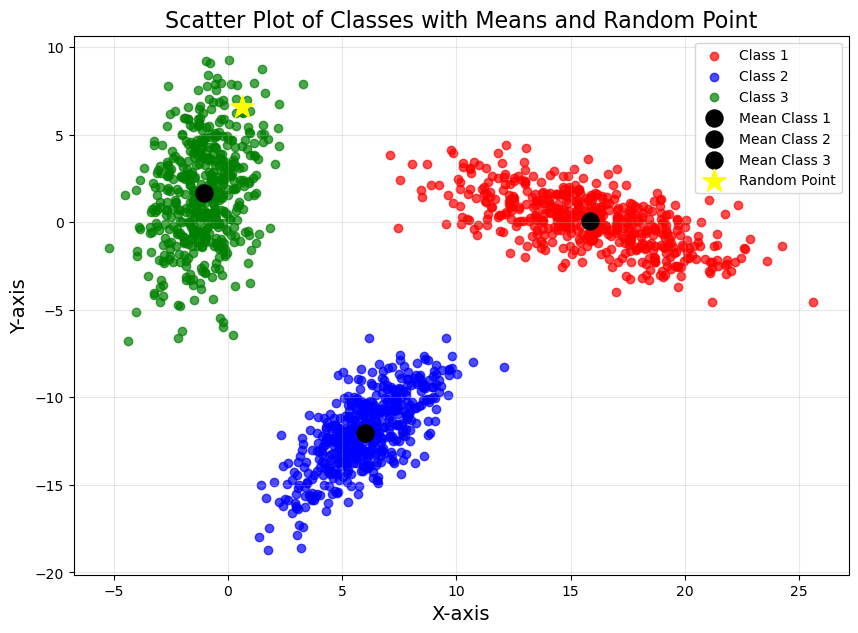

In [7]:
# Scatter plot of the classes
plt.figure(figsize=(10, 7))

# Scatter for class1
plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)

# Scatter for class2
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)

# Scatter for class3
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)

# Plot the means of each class
plt.scatter(mean_class1[0], mean_class1[1], color='black', marker='o', s=150, label='Mean Class 1')
plt.scatter(mean_class2[0], mean_class2[1], color='black', marker='o', s=150, label='Mean Class 2')
plt.scatter(mean_class3[0], mean_class3[1], color='black', marker='o', s=150, label='Mean Class 3')

# Plot the random point
plt.scatter(random_point[0], random_point[1], color='yellow', marker='*', s=300, label='Random Point')

# Add labels, title, legend, and grid
plt.title("Scatter Plot of Classes with Means and Random Point", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()


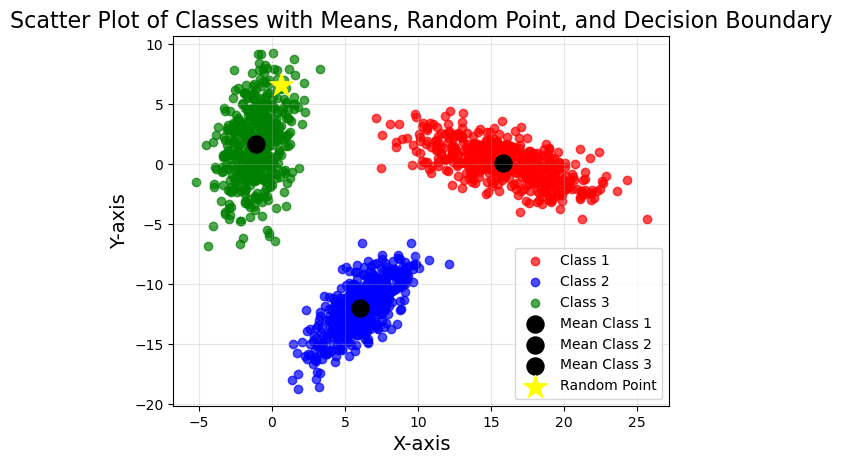

In [8]:
# Create the meshgrid for plotting decision boundary
x_min, x_max = X['X'].min() - 1, X['X'].max() + 1
y_min, y_max = X['Y'].min() - 1, X['Y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Scatter for class1
plt.scatter(class1['X'], class1['Y'], color='red', label='Class 1', alpha=0.7)

# Scatter for class2
plt.scatter(class2['X'], class2['Y'], color='blue', label='Class 2', alpha=0.7)

# Scatter for class3
plt.scatter(class3['X'], class3['Y'], color='green', label='Class 3', alpha=0.7)

# Plot the means of each class
plt.scatter(mean_class1[0], mean_class1[1], color='black', marker='o', s=150, label='Mean Class 1')
plt.scatter(mean_class2[0], mean_class2[1], color='black', marker='o', s=150, label='Mean Class 2')
plt.scatter(mean_class3[0], mean_class3[1], color='black', marker='o', s=150, label='Mean Class 3')

# Plot the random point
plt.scatter(random_point[0], random_point[1], color='yellow', marker='*', s=300, label='Random Point')

# Add labels, title, legend, and grid
plt.title("Scatter Plot of Classes with Means, Random Point, and Decision Boundary", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

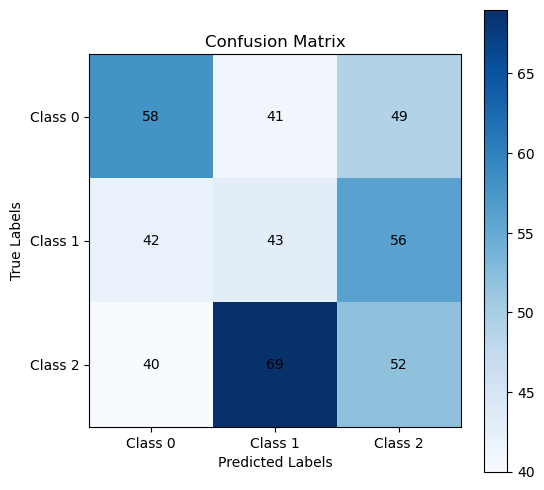


Metrics per Class:
Class 0: Precision = 0.41, Recall = 0.39, F-Score = 0.40
Class 1: Precision = 0.28, Recall = 0.30, F-Score = 0.29
Class 2: Precision = 0.33, Recall = 0.32, F-Score = 0.33


In [9]:
# Confusion Matrix and Metrics
def confusion_matrix_manual(y_true, y_pred, num_classes):
    cm = np.zeros((num_classes, num_classes), dtype=int)
    for i in range(len(y_true)):
        cm[int(y_true[i]), int(y_pred[i])] += 1
    return cm

# Placeholder: Simulating predictions (replace with actual model predictions)
y_pred = np.random.choice([0, 1, 2], size=len(y_test))  # Replace this with actual predictions

cm = confusion_matrix_manual(y_test, y_pred, num_classes=len(class_means))

def plot_confusion_matrix(cm):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, cmap="Blues")
    plt.colorbar()
    plt.xticks(range(len(cm)), labels=[f"Class {i}" for i in range(len(cm))])
    plt.yticks(range(len(cm)), labels=[f"Class {i}" for i in range(len(cm))])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
    plt.show()

plot_confusion_matrix(cm)

# Precision, Recall, F1-Score
precision, recall, f1_score = [], [], []

for i in range(len(class_means)):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    precision_i = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall_i = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score_i = (2 * precision_i * recall_i) / (precision_i + recall_i) if (precision_i + recall_i) > 0 else 0
    precision.append(precision_i)
    recall.append(recall_i)
    f1_score.append(f1_score_i)

print("\nMetrics per Class:")
for i in range(len(class_means)):
    print(f"Class {i}: Precision = {precision[i]:.2f}, Recall = {recall[i]:.2f}, F-Score = {f1_score[i]:.2f}")
